In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import data
df = pd.read_csv("../data/original_data_file.csv")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid,target
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN,1
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN,1
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN,1
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN,1
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN,1


In [29]:
def threshold(df, col, t):
    return df.loc[df[col] >= t]

In [30]:
col = 'choose_one:confidence'
print("Min Confidence (stock): {:.2f}".format(df[col].min()))
print("Min Confidence (.9): {:.2f}".format(threshold(df,col,0.9)[col].min()))

Min Confidence (stock): 0.33
Min Confidence (.9): 0.92


Text(0.5, 1.0, 'Samples vs Min Confidence')

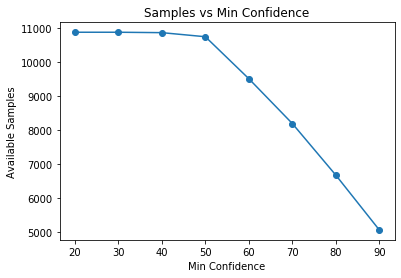

In [32]:
col = 'choose_one:confidence'
samples = []
for i in range(2,10):
    samples.append(len(threshold(df,col, i/10)))
    
plt.plot((np.arange(8)+2)*10, samples, '-o')
plt.xlabel("Min Confidence")
plt.ylabel("Available Samples")
plt.title("Samples vs Min Confidence")

Text(0.5, 1.0, 'Samples vs Min Confidence')

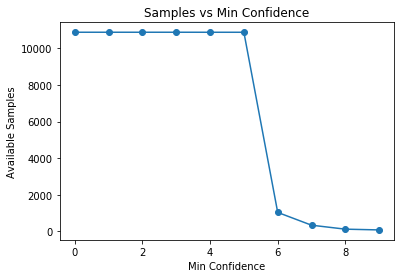

In [36]:
col = '_trusted_judgments'
samples = []
for i in range(10):
    samples.append(len(threshold(df,col, i)))
    
plt.plot((np.arange(10)), samples, '-o')
plt.xlabel("Min Confidence")
plt.ylabel("Available Samples")
plt.title("Samples vs Min Confidence")

In [39]:
df.loc[df['choose_one'] == 'Relevant']['choose_one:confidence'].mean()

0.8424158784506741